<a href="https://colab.research.google.com/github/Beebruna/Treinamento_Data_Science/blob/main/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dropout, BatchNormalization

In [2]:
cifar = keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


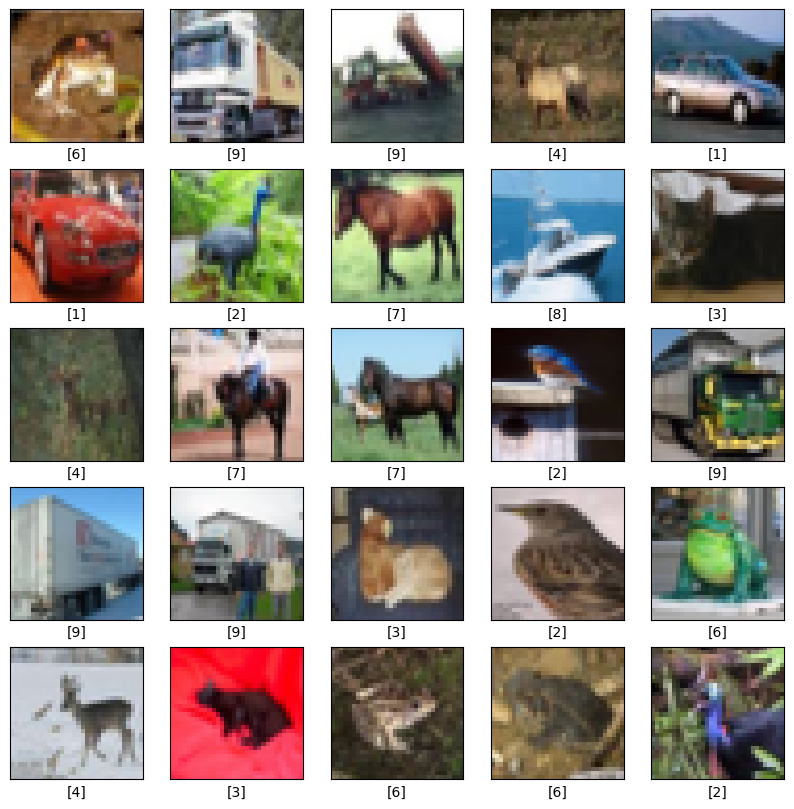

In [5]:
fig = plt.figure(figsize=(10, 10))

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(train_images[i], cmap='binary')
    ax.set_xlabel(train_labels[i])
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [6]:
train_images = train_images / 255
test_images = test_images / 255

In [8]:
def def_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
    model.add(BatchNormalization())

    model.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
    model.add(BatchNormalization())

    model.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
    model.add(BatchNormalization())

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024, activation='relu'))
    model.add(Dropout(0.33))

    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

In [10]:
model = def_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                      

In [11]:
history = model.fit(train_images, train_labels, epochs=25, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 19s 6ms/step - loss: 1.5298 - accuracy: 0.4851 - val_loss: 1.9040 - val_accuracy: 0.3789
Epoch 2/25
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0737 - accuracy: 0.6335 - val_loss: 1.1480 - val_accuracy: 0.6020
Epoch 3/25
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9075 - accuracy: 0.6896 - val_loss: 0.9618 - val_accuracy: 0.6778
Epoch 4/25
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7677 - accuracy: 0.7411 - val_loss: 1.1366 - val_accuracy: 0.6155
Epoch 5/25
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6470 - accuracy: 0.7816 - val_loss: 1.1989 - val_accuracy: 0.6093
Epoch 6/25
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5435 - accuracy: 0.8148 - val_loss: 0.8658 - val_accuracy: 0.7418
Epoch 7/25
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4543 - accuracy: 0.8446 - val_loss: 0.8711 - val_accuracy

In [12]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='lower left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('epoch')
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()

In [13]:
def print_eval(test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(test_loss)
    print(test_acc)

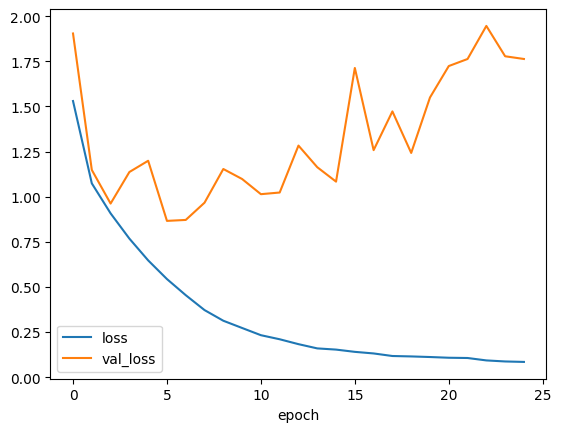

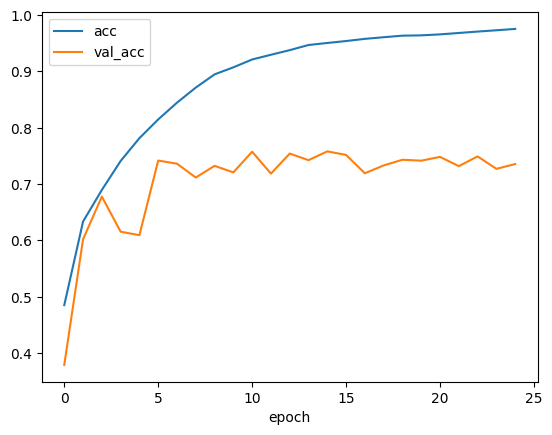

313/313 [==============================] - 1s 4ms/step - loss: 1.8659 - accuracy: 0.7224
1.8659144639968872
0.7224000096321106


In [14]:
plot_history(history)
print_eval(test_images, test_labels)

In [17]:
model = def_model()
meus_callbacks = [
    keras.callbacks.EarlyStopping(patience=3), # Monitora a loss function
    keras.callbacks.ModelCheckpoint(
        filepath='model.{epoch:02d}.{val_loss:.2f}.h5') # persiste o modelo
]

history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2, callbacks=meus_callbacks)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                      

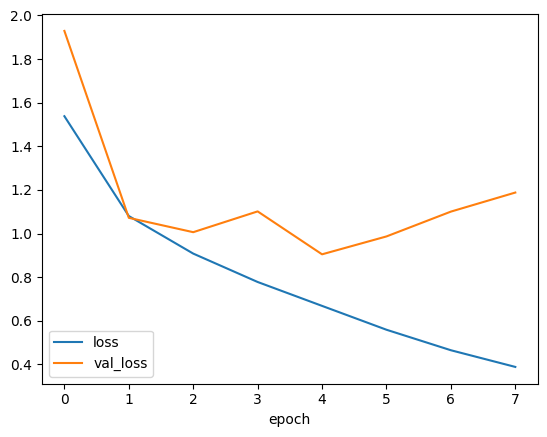

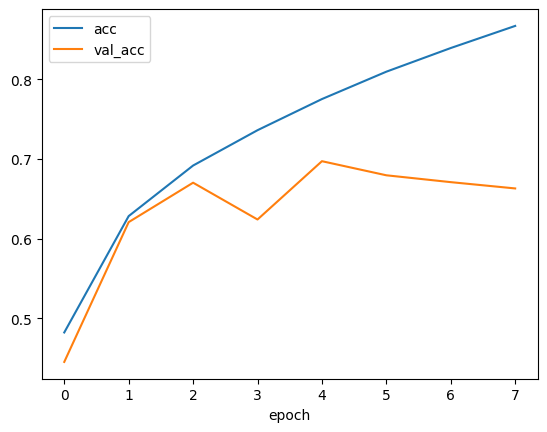

313/313 [==============================] - 1s 4ms/step - loss: 1.2082 - accuracy: 0.6520
1.2082020044326782
0.6520000100135803


In [18]:
plot_history(history)
print_eval(test_images, test_labels)